<a href="https://colab.research.google.com/github/hideaki-kyutech/softcomp2023/blob/main/ga2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 遺伝的アルゴリズム

## 準備

In [1]:
!pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 819.7 kB/s eta 0:00:00


In [2]:
# パッケージのインポート
import pygad
import numpy

## 実装例

In [5]:
# define the imputs and outputs
function_inputs = [4,-2,3.5,5,-11,-4.7] # [x1,x2,x3,x4,x5,x6]
desired_output =44 # desired output of function f(x;w)

In [9]:
#Define the fitness function
# This function Calculates the fitness value of
# each solution in the current population.
# i.e. it calulates the sum of products between each input
# and its corresponding weight. We store the returned value in
# a variable called as fitness_function

def fitness_func(ga_instance, solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

In [10]:
fitness_function = fitness_func

num_generations = 50
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [11]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

In [12]:
ga_instance.run()

In [13]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [ 3.61426507 -2.31579609  1.48443835  2.75728067 -0.06335591 -1.12322234]
Fitness value of the best solution = 21.436199035492027
Predicted output based on the best solution : 44.046650061344565


[[ 1.84169453  3.00632556  2.21934363  1.81418228  0.9655836   2.52125879]
 [ 1.06311048  4.24241101  4.74563932  0.68409063  3.54207527  1.70226444]
 [ 1.97631193  4.47917647 -1.50274759 -1.3900949  -1.85847122  3.82833892]
 [ 3.44709726  4.09008504  4.8503284   3.59410995  1.23035554  3.46370423]
 [-1.17207902  2.47944715 -0.99652699  4.61268242  1.65293825  0.90263358]
 [-0.14811072  3.41963583  1.19305233  1.97903764 -1.8684714   2.32344848]
 [ 2.28467006  2.31853798  4.60623655  2.77274209  0.5165553   1.05922368]
 [ 2.88341837 -1.5784217   2.66736701  2.69446509 -0.52732207 -1.09751592]
 [ 0.20799846  0.5459754   1.99137739  1.07021059  4.91861687 -1.28568632]
 [-0.53786271 -0.87083337  2.57175828 -0.22695878  1.26417541 -0.28902086]
 [-0.88721291 -1.22737401  2.59430713 -1.03271934 -0.62392347  0.58107619]
 [ 3.74695261 -1.32029107  3.86561435 -1.32731114  4.83521626  1.28055841]
 [ 4.83732762  2.23391864  3.17484506 -1.72568545 -0.02035126 -1.15862407]
 [ 0.07298138 -1.16890597

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


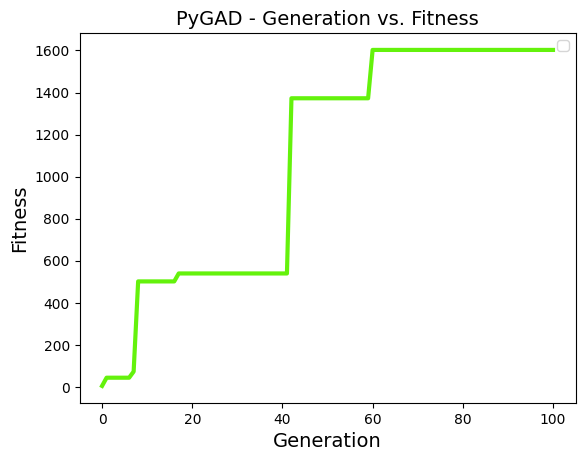


Best weight vector :[ 2.82837786 -1.59279644  3.0602448   4.17202058 -0.09294173  0.65782959]

Predicted value   : 44.000624000902185


In [15]:
numpy.random.seed(0)

fitness_function = fitness_func

# Define parameters to be used for GA
# sol_per_pop gives the number of chromosomes in the population
# and num_genes gives the genes in one chromosome.

sol_per_pop = 50 # number of population
num_genes = len(function_inputs)

##These values define the range from which we will extract the
# values randomly for initializing the genes.

init_range_low = -2
init_range_high = 5

# the population variable is then defined by the tuple pop_size

pop_size = (sol_per_pop,num_genes)


# let us now make a random population for illustration puposes.
# The pygad constructor actually does this automatically by using
# sol_per_pop and num_genes parameters

initial_population = numpy.random.uniform(low=init_range_low,
                                          high =init_range_high,
                                          size=pop_size)
print(initial_population)

#Next we define the number of generations that the iteration will continue
# and how many parents will take part in reproduction/mating
num_generations=100
num_parents_mating= 20

# We define the parent selection type as Roulette wheel selection
parent_selection_type= 'rws'
# next we define how many parents to keep for next generation
keep_parents = 1
#Crossover type
crossover_type = 'single_point'

#Mutation type
mutation_type = 'random'

# Percentage of number of genes that will participate in mutation
mutation_percent_genes = 10


#Creating an instance of GA

ga_instance= pygad.GA(num_generations=num_generations,
                      num_parents_mating=num_parents_mating,
                      fitness_func=fitness_function,
                      sol_per_pop=sol_per_pop,
                      num_genes=num_genes,
                      init_range_low=init_range_low,
                      init_range_high=init_range_high,
                      parent_selection_type=parent_selection_type,
                      keep_parents=keep_parents,
                      crossover_type=crossover_type,
                      mutation_type=mutation_type,
                      mutation_percent_genes=mutation_percent_genes)

#We use the function run() to execute the simulations
ga_instance.run()

# plot the reuslts - the plateau shows the maximum value of fitness
ga_instance.plot_fitness()

# Now we determine the best solution i.e. the weight vector that gives the
# best solution

solution,solution_fitness,_ =ga_instance.best_solution()
print('\nBest weight vector :{solution}'.format(solution=solution))

# lets see how the algorithm approximated the output when
# substituted by the best solution weight vector

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print('\nPredicted value   : {prediction}'.format(prediction=prediction))